In [1]:
#!pip install pandas
#%matplotlib inline
import math
import numpy as np
import pandas as pd
import pandasql as ps
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import IPython.display as ipd

import ast

from collections import defaultdict
from scipy.stats.stats import pearsonr

plt.rcParams['axes.formatter.useoffset']=False
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('flat_df_no_nulli.csv', index_col=0)

In [3]:
df

,ALBUM_date_released_year,ALBUM_favorites,ALBUM_type,ALBUM_tags,ALBUM_tracks,ALBUM_listens,ALBUM_title,SET_subset,ARTIST_favorites,ARTIST_location,ARTIST_tags,ARTIST_name,TRACK_duration,TRACK_favorites,TRACK_genre_top,TRACK_genres_all,TRACK_genres,TRACK_interest,TRACK_listens,TRACK_tags,TRACK_title,TRACK_bitrate,TRACK_number,rmsekurtosis01,rmsemax01,rmsemean01,rmsemedian01,rmsemin01,rmseskew01,rmsestd01,spectral_bandwidthkurtosis01,spectral_bandwidthmax01,spectral_bandwidthmean01,spectral_bandwidthmedian01,spectral_bandwidthmin01,spectral_bandwidthskew01,spectral_bandwidthstd01,spectral_centroidkurtosis01,spectral_centroidmax01,spectral_centroidmean01,spectral_centroidmedian01,spectral_centroidmin01,spectral_centroidskew01,spectral_centroidstd01,spectral_rolloffkurtosis01,spectral_rolloffmax01,spectral_rolloffmean01,spectral_rolloffmedian01,spectral_rolloffmin01,spectral_rolloffskew01,spectral_rolloffstd01,zcrkurtosis01,zcrmax01,zcrmean01,zcrmedian01,zcrmin01,zcrskew01,zcrstd01,TRACK_genres_soloTop,ARTIST_favorites_,ALBUM_tracks_,ALBUM_listens_,ALBUM_favorites_,ALBUM_type_,ALBUM_date_released_year_,Blues,Classical,Country,Easy Listening,Electronic,Experimental,Folk,Hip-Hop,Instrumental,International,Jazz,Old-Time / Historic,Pop,Rock,Soul-RnB,Spoken,chroma_censkurtosis,chroma_censmax,chroma_censmean,chroma_censmedian,chroma_censmin,chroma_censskew,chroma_censstd,chroma_censcqtkurtosis,chroma_cqtmax,chroma_cqtmean,chroma_cqtmedian,chroma_cqtmin,chroma_cqtskew,chroma_cqtstd,chroma_stftkurtosis,chroma_stftmax,chroma_stftmean,chroma_stftmedian,chroma_stftmin,chroma_stftskew,chroma_stftstd,mfcckurtosis,mfccmax,mfccmean,mfccmedian,mfccmin,mfccskew,mfccstd,spectral_contrastkurtosis,spectral_contrastmax,spectral_contrastmean,spectral_contrastmedian,spectral_contrastmin,spectral_contrastskew,spectral_contraststd,tonnetzkurtosis,tonnetzmax,tonnetzmean,tonnetzmedian,tonnetzmin,tonnetzskew,tonnetzstd,ARTIST_location_
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2009.0,4.0,Album,[],7.0,6073.0,AWOL - A Way Of Life,small,2.302585,New Jersey,['awol'],AWOL,168,1.098612,Hip-Hop,[21],['21'],8.446127,7.165493,[],Food,256000,3,2.499856,14.748096,3.188761,2.653895,0.000000,1.565426,2.536809,3.874384,3451.105957,1607.474365,1618.850098,0.000000,-0.884317,436.808990,2.406808,5514.049805,1639.583252,1503.496704,0.000000,1.079815,719.770508,0.840540,9410.009766,3267.804688,3143.847656,0.000000,0.347372,1300.729736,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448,['Hip-Hop'],9.0,3.0,7.165493,1.098612,Album,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.279389,0.112555,-0.143922,-0.165123,-0.028040,-2.740602,0.132277,4.372140,-0.002102,-0.159066,-0.262436,-0.092806,-2.184695,0.028168,-0.975603,-0.000779,0.149664,-0.164355,-0.016616,0.589170,-0.006238,-0.753965,-63.770708,-54.514267,-62.362546,-24.629408,0.383883,14.101151,1.668064,-2.545115,-7.407170,-8.389809,-1.293357,-1.189231,0.746760,1.335255,-0.069000,0.063224,-0.055764,0.206749,-0.152102,-0.075675,North America
3,2009.0,4.0,Album,[],7.0,6073.0,AWOL - A Way Of Life,medium,2.302585,New Jersey,['awol'],AWOL,237,0.693147,Hip-Hop,[21],['21'],7.293698,6.244167,[],Electric Ave,256000,4,-0.643963,9.096919,3.607359,3.706424,0.000000,0.018619,1.952665,2.383340,3469.176514,1736.961426,1686.766602,0.000000,0.464217,486.662476,3.519866,6288.426758,1763.012451,1517.993652,0.000000,1.652693,972.758423,2.379145,10002.172852,3514.619629,3413.012695,0.000000,1.118952,1650.357788,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330,['Hip-Hop'],9.0,4.0,6.244167,0.693147,Album,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.348105,0.141263,0.148353,0.165589,-0.028040,-0.832174,0.120936,-1.078200,-0.002102,-0.242421,-0.303482,-0.092806,-1.014772,0.037748,-1.800064,-0.000779,-0.111860,0.160687,-0.016616,-0.667940,-0.044654,-0.336291,-72.777076,-59.487557,-66.

In [6]:
X = df[["TRACK_favorites", "ALBUM_listens_", "TRACK_interest", "TRACK_listens", "TRACK_number", "ARTIST_favorites_", "ALBUM_tracks_", "ALBUM_favorites_"]].values

In [ ]:
df.boxplot(column='ARTIST_favorites')

In [ ]:
np.percentile(df, 25)

In [ ]:
df.boxplot(column='TRACK_duration')

In [ ]:
ALBUM_date_released_year TRACK_genres TRACK_favorites TRACK_genres_all TRACK_interest TRACK_listens TRACK_number ARTIST_favorites ALBUM_tracks ALBUM_favorites ALBUM_date_released_year

In [ ]:
#df.boxplot(column='TRACK_favorites')

_, bp = df.boxplot(column='TRACK_favorites', return_type='both')



outliers = [flier.get_ydata() for flier in bp["fliers"]]
#df = df.drop( df[df["TRACK_favorites"] >= np.amin(outliers)].index )

len(outliers[0])

In [ ]:
#np.percentile(df.TRACK_favorites, 75)
#or i< np.percentile(df.TRACK_favorites, 25)
n=0;
outl_TRACK_favorites = np.ones((len(df.TRACK_favorites), 1), dtype=bool);
for i in df.TRACK_favorites:
    if i > np.percentile(df.TRACK_favorites, 75):
        outl_TRACK_favorites[n] = True;
        n=n+1;
    else:
        outl_TRACK_favorites[n] = False;
        n=n+1;

print(outl_TRACK_favorites)
outl_TRACK_favorites.sum()       
       

In [ ]:
df.boxplot(column='TRACK_interest')

In [ ]:
np.percentile(df.TRACK_interest, 75)
n=0;
outl_TRACK_interest = np.ones((len(df.TRACK_interest), 1), dtype=bool);
for i in df.TRACK_interest:
    if i > np.percentile(df.TRACK_interest, 75) or i< np.percentile(df.TRACK_interest, 25):
        outl_TRACK_interest[n] = True;
        n=n+1;
    else:
        outl_TRACK_interest[n] = False;
        n=n+1;

print(outl_TRACK_interest)
        
       

In [ ]:
df.boxplot(column='TRACK_listens')

In [ ]:
np.percentile(df.TRACK_listens, 75)
n=0;
outl_TRACK_listens = np.ones((len(df.TRACK_favorites), 1), dtype=bool);
for i in df.TRACK_listens:
    if i > np.percentile(df.TRACK_listens, 75) or i< np.percentile(df.TRACK_listens, 25):
        outl_TRACK_listens[n] = True;
        n=n+1;
    else:
        outl_TRACK_listens[n] = False;
        n=n+1;

print(outl_TRACK_listens)

In [ ]:
df.boxplot(column='TRACK_number')

In [ ]:
np.percentile(df.TRACK_number, 75)
n=0;
outl_TRACK_number = np.ones((len(df.TRACK_number), 1), dtype=bool);
for i in df.TRACK_number:
    if i > np.percentile(df.TRACK_number, 75) or i< np.percentile(df.TRACK_number, 25):
        outl_TRACK_number[n] = True;
        n=n+1;
    else:
        outl_TRACK_number[n] = False;
        n=n+1;

print(outl_TRACK_number)

In [ ]:
df.boxplot(column='ARTIST_favorites')

In [ ]:
np.percentile(df.ARTIST_favorites, 75)
n=0;
outl_ARTIST_favorites = np.ones((len(df.ARTIST_favorites), 1), dtype=bool);
for i in df.ARTIST_favorites:
    if i > np.percentile(df.ARTIST_favorites, 75) or i< np.percentile(df.ARTIST_favorites, 25):
        outl_ARTIST_favorites[n] = True;
        n=n+1;
    else:
        outl_ARTIST_favorites[n] = False;
        n=n+1;

print(outl_ARTIST_favorites)

In [ ]:
df.boxplot(column='ALBUM_favorites')

In [ ]:
np.percentile(df.ALBUM_favorites, 75)
n=0;
outl_ALBUM_favorites = np.ones((len(df.ALBUM_favorites), 1), dtype=bool);
for i in df.ALBUM_favorites:
    if i > np.percentile(df.ALBUM_favorites, 75) or i< np.percentile(df.ALBUM_favorites, 25):
        outl_ALBUM_favorites[n] = True;
        n=n+1;
    else:
        outl_ALBUM_favorites[n] = False;
        n=n+1;

print(outl_ALBUM_favorites)

In [ ]:
df.boxplot(column='ALBUM_tracks')

In [ ]:
np.percentile(df.ALBUM_tracks, 75)
n=0;
outl_ALBUM_tracks = np.ones((len(df.ALBUM_tracks), 1), dtype=bool);
for i in df.ALBUM_tracks:
    if i > np.percentile(df.ALBUM_tracks, 75) or i< np.percentile(df.ALBUM_tracks, 25):
        outl_ALBUM_tracks[n] = True;
        n=n+1;
    else:
        outl_ALBUM_tracks[n] = False;
        n=n+1;

print(outl_ALBUM_tracks)

In [ ]:
df.boxplot(column='ALBUM_date_released_year')

In [2]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=100, min_samples=4)
dbscan.fit(X)

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

## LOF

In [7]:
from sklearn.neighbors import LocalOutlierFactor

In [8]:
clf = LocalOutlierFactor(n_neighbors=2)
outliers = clf.fit_predict(X)

In [9]:
clf.negative_outlier_factor_

array([-1.05938833, -0.98060718, -1.06076111, ..., -1.11343762,
       -0.97580096, -0.89486003])

In [10]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([14090, 91445], dtype=int64))

In [11]:
np.where(outliers==-1)

(array([     3,      7,     10, ..., 105516, 105523, 105531], dtype=int64),)

In [12]:
clf.negative_outlier_factor_[np.where(outliers==-1)]

array([-2.67231704, -3.0317456 , -1.54370592, ..., -5.14061823,
       -2.30153798, -2.88685281])

In [13]:
np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

-1.5000414947034124

In [14]:
np.min(clf.negative_outlier_factor_[np.where(outliers==-1)])

-28.21166998500644

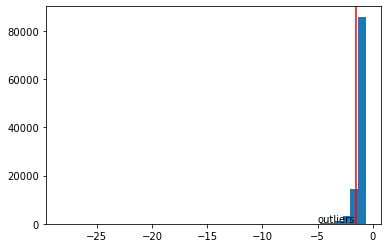

In [37]:
plt.hist(clf.negative_outlier_factor_, bins=40)
plt.axvline(-1.5, c='r')
plt.text(-5, 600, 'outliers')
plt.show()

In [68]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
#from pyod.models.lof import LOF
#from pyod.models.loci import LOCI
#from pyod.models.auto_encoder import AutoEncoder

## ABOD

In [45]:
clf = ABOD()
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [46]:
clf.decision_scores_

array([-2.57290458e+00, -2.79168347e+02, -7.58426569e+00, ...,
       -9.66949134e+01, -2.57135588e+04, -3.09841569e+01])

In [47]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([94723, 10812], dtype=int64))

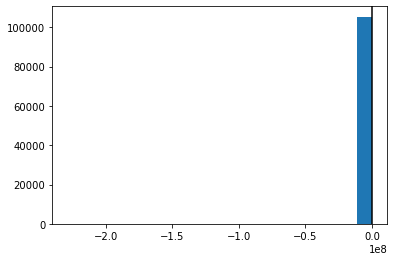

In [56]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

## KNN

In [58]:
clf = KNN()
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [59]:
clf.decision_scores_

array([0.84350562, 0.4802062 , 0.63123484, ..., 0.43301901, 0.08138433,
       0.49894777])

In [60]:
anomlay_score = clf.decision_function(X)

In [61]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([96732,  8803], dtype=int64))

In [62]:
np.mean(anomlay_score[np.where(outliers==1)])

2.1857596905125267

In [63]:
np.mean(anomlay_score[np.where(outliers==0)])

0.5098144878650654

In [64]:
np.mean(clf.decision_scores_[np.where(outliers==1)])

2.358151577797204

In [65]:
np.mean(clf.decision_scores_[np.where(outliers==0)])

0.5626978993443565

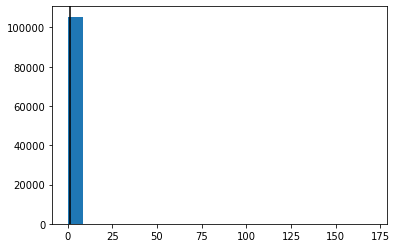

In [66]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()